In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_csv("Seoul.csv", parse_dates=True)
df.head()

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0  01/12/2017                254     0            -5.2           37   
1  01/12/2017                204     1            -5.5           38   
2  01/12/2017                173     2            -6.0           39   
3  01/12/2017                107     3            -6.2           40   
4  01/12/2017                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [17]:
df.describe()

Rented Bike Count         Hour  Temperature(C)  Humidity(%)  \
count        8760.000000  8760.000000     8760.000000  8760.000000   
mean          704.602055    11.500000       12.882922    58.226256   
std           644.997468     6.922582       11.944825    20.362413   
min             0.000000     0.000000      -17.800000     0.000000   
25%           191.000000     5.750000        3.500000    42.000000   
50%           504.500000    11.500000       13.700000    57.000000   
75%          1065.250000    17.250000       22.500000    74.000000   
max          3556.000000    23.000000       39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
count       8760.000000       8760.000000               8760.000000   
mean           1.724909       1436.825799                  4.073813   
std            1.036300        608.298712                 13.060369   
min            0.000000         27.000000                -30.600000   
25%            0.900000        940.000000                 -4.700000   
50%            1.500000       1698.000000                  5.100000   
75%            2.300000       2000.000000                 14.800000   
max            7.400000       2000.000000                 27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [18]:
# it takes 5 parameters subset or column names [], normalize=True, sort=True, dropna=True and ascending=False
df.value_counts(normalize=True, sort=True, dropna=True, ascending=False)

Date        Rented Bike Count  Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday     Functioning Day
01/01/2018  61                 5     -4.4            54           0.8               1786              -12.3                     0.00                     0.0           0.0            Winter   Holiday     Yes                0.000114
21/04/2018  707                0      16.3           59           0.2               756                8.2                      0.00                     0.0           0.0            Spring   No Holiday  Yes                0.000114
            324                7      12.5           68           1.1               457                6.7                      0.22                     0.0           0.0            Spring   No Holiday  Yes                0.000114
            436                2      14.7           63           1.8               611 

In [19]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [20]:
# checking null vlaues 
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [27]:
# converted date column datetype from object to Datetime
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)
df.Date.head()

0   2017-12-01
1   2017-12-01
2   2017-12-01
3   2017-12-01
4   2017-12-01
Name: Date, dtype: datetime64[ns]

# Exploratory Data Analysis

In [30]:
# We have 3 parameters only in this method=['kendal', 'pearson', 'spearman'], min_periods= 3 and numeric_only=[True or False]
df.corr(numeric_only=True)

Rented Bike Count      Hour  Temperature(C)  \
Rented Bike Count                  1.000000  0.410257        0.538558   
Hour                               0.410257  1.000000        0.124114   
Temperature(C)                     0.538558  0.124114        1.000000   
Humidity(%)                       -0.199780 -0.241644        0.159371   
Wind speed (m/s)                   0.121108  0.285197       -0.036252   
Visibility (10m)                   0.199280  0.098753        0.034794   
Dew point temperature(C)           0.379788  0.003054        0.912798   
Solar Radiation (MJ/m2)            0.261837  0.145131        0.353505   
Rainfall(mm)                      -0.123074  0.008715        0.050282   
Snowfall (cm)                     -0.141804 -0.021516       -0.218405   

                          Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count           -0.199780          0.121108          0.199280   
Hour                        -0.241644          0.285197          0.098753   
Temperature(C)               0.159371         -0.036252          0.034794   
Humidity(%)                  1.000000         -0.336683         -0.543090   
Wind speed (m/s)            -0.336683          1.000000          0.171507   
Visibility (10m)            -0.543090          0.171507          1.000000   
Dew point temperature(C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)     -0.461919          0.332274          0.149738   
Rainfall(mm)                 0.236397         -0.019674         -0.167629   
Snowfall (cm)                0.108183         -0.003554         -0.121695   

                          Dew point temperature(C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                         0.379788                 0.261837   
Hour                                      0.003054                 0.145131   
Temperature(C)                            0.912798                 0.353505   
Humidity(%)                               0.536894                -0.461919   
Wind speed (m/s)                         -0.176486                 0.332274   
Visibility (10m)                         -0.176630                 0.149738   
Dew point temperature(C)                  1.000000                 0.094381   
Solar Radiation (MJ/m2)                   0.094381                 1.000000   
Rainfall(mm)                              0.125597                -0.074290   
Snowfall (cm)                            -0.150887                -0.072301   

                          Rainfall(mm)  Snowfall (cm)  
Rented Bike Count            -0.123074      -0.141804  
Hour                          0.008715      -0.021516  
Temperature(C)                0.050282      -0.218405  
Humidity(%)                   0.236397       0.108183  
Wind speed (m/s)             -0.019674      -0.003554  
Visibility (10m)             -0.167629      -0.121695  
Dew point temperature(C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)      -0.074290      -0.072301  
Rainfall(mm)                  1.000000       0.008500  
Snowfall (cm)                 0.008500       1.000000

<Axes: >

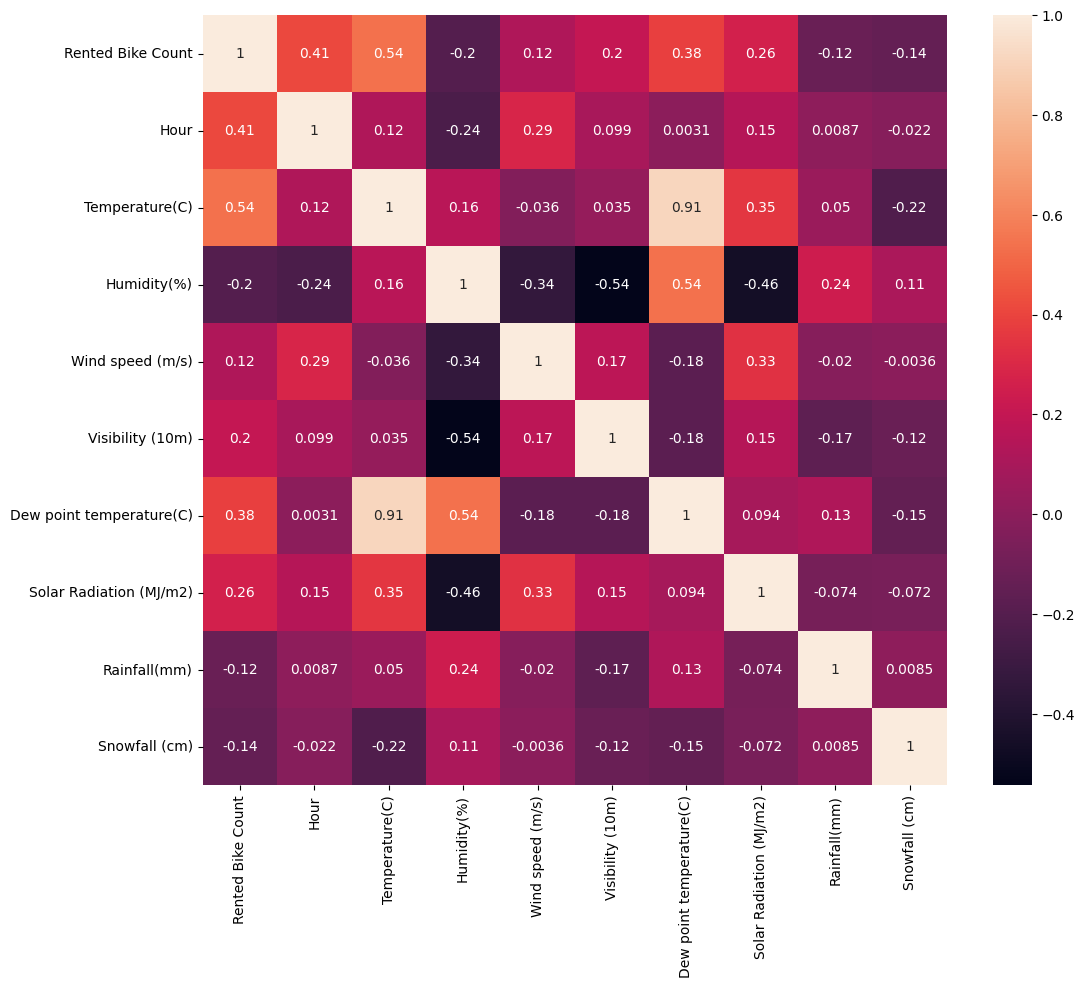

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

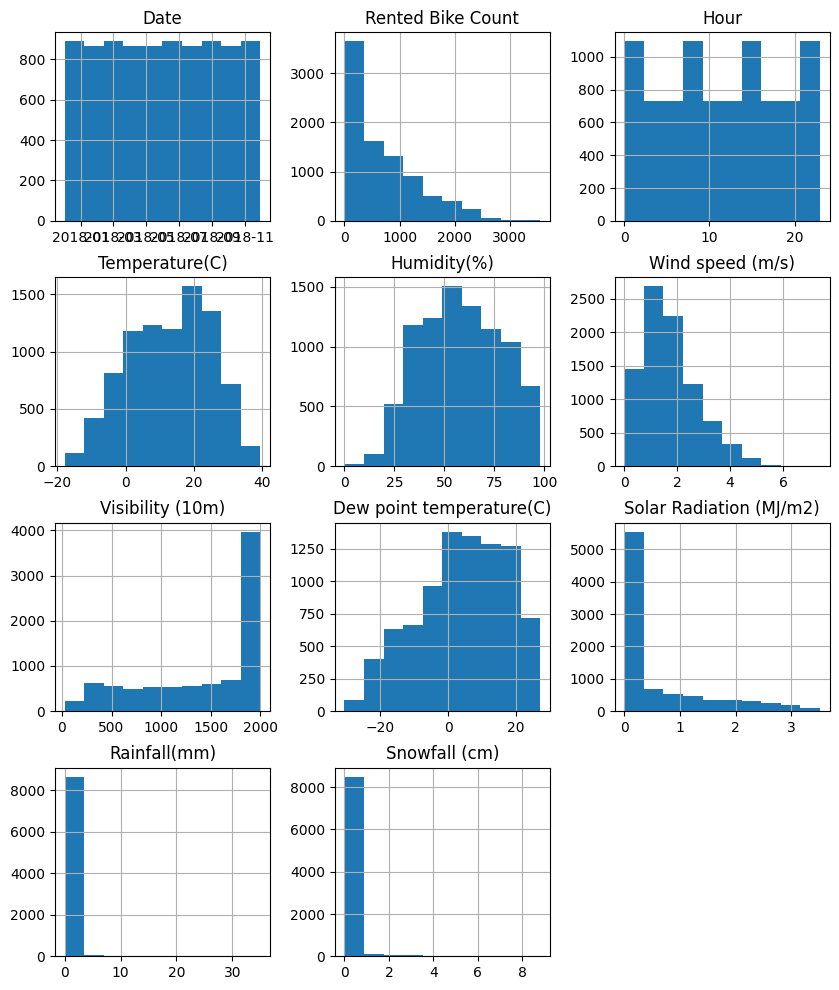

In [35]:
df.hist(figsize=(10, 12))
plt.show()

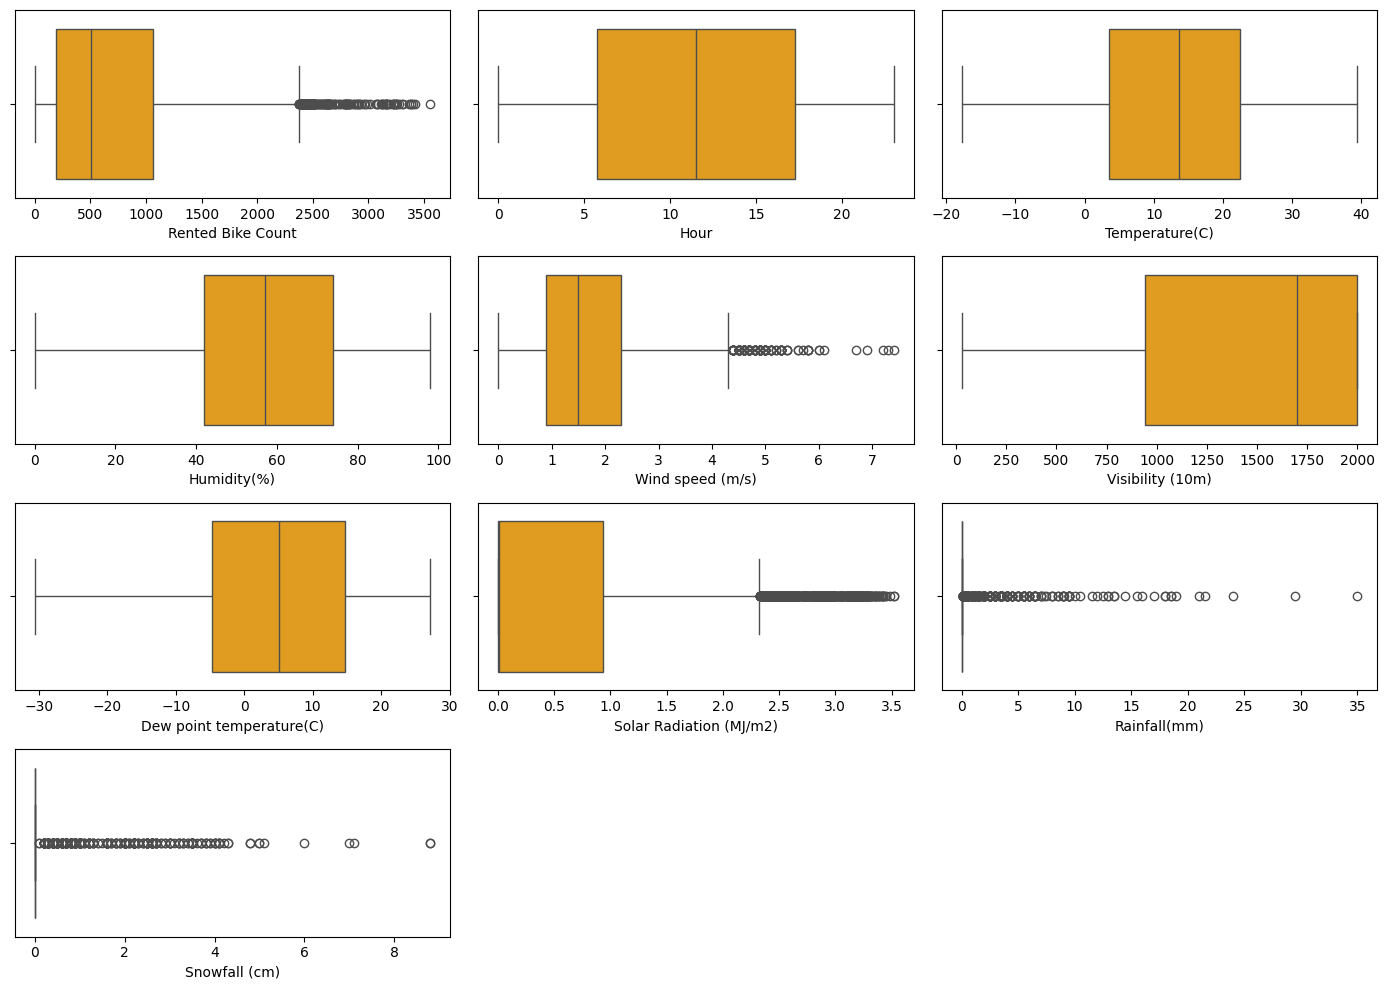

In [52]:
col_name = df.select_dtypes(exclude="object").columns
plt.figure(figsize=(14, 10))

for i, col in enumerate(col_name[1:], start=1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=col, data=df, color="orange", orient='y')
plt.tight_layout()

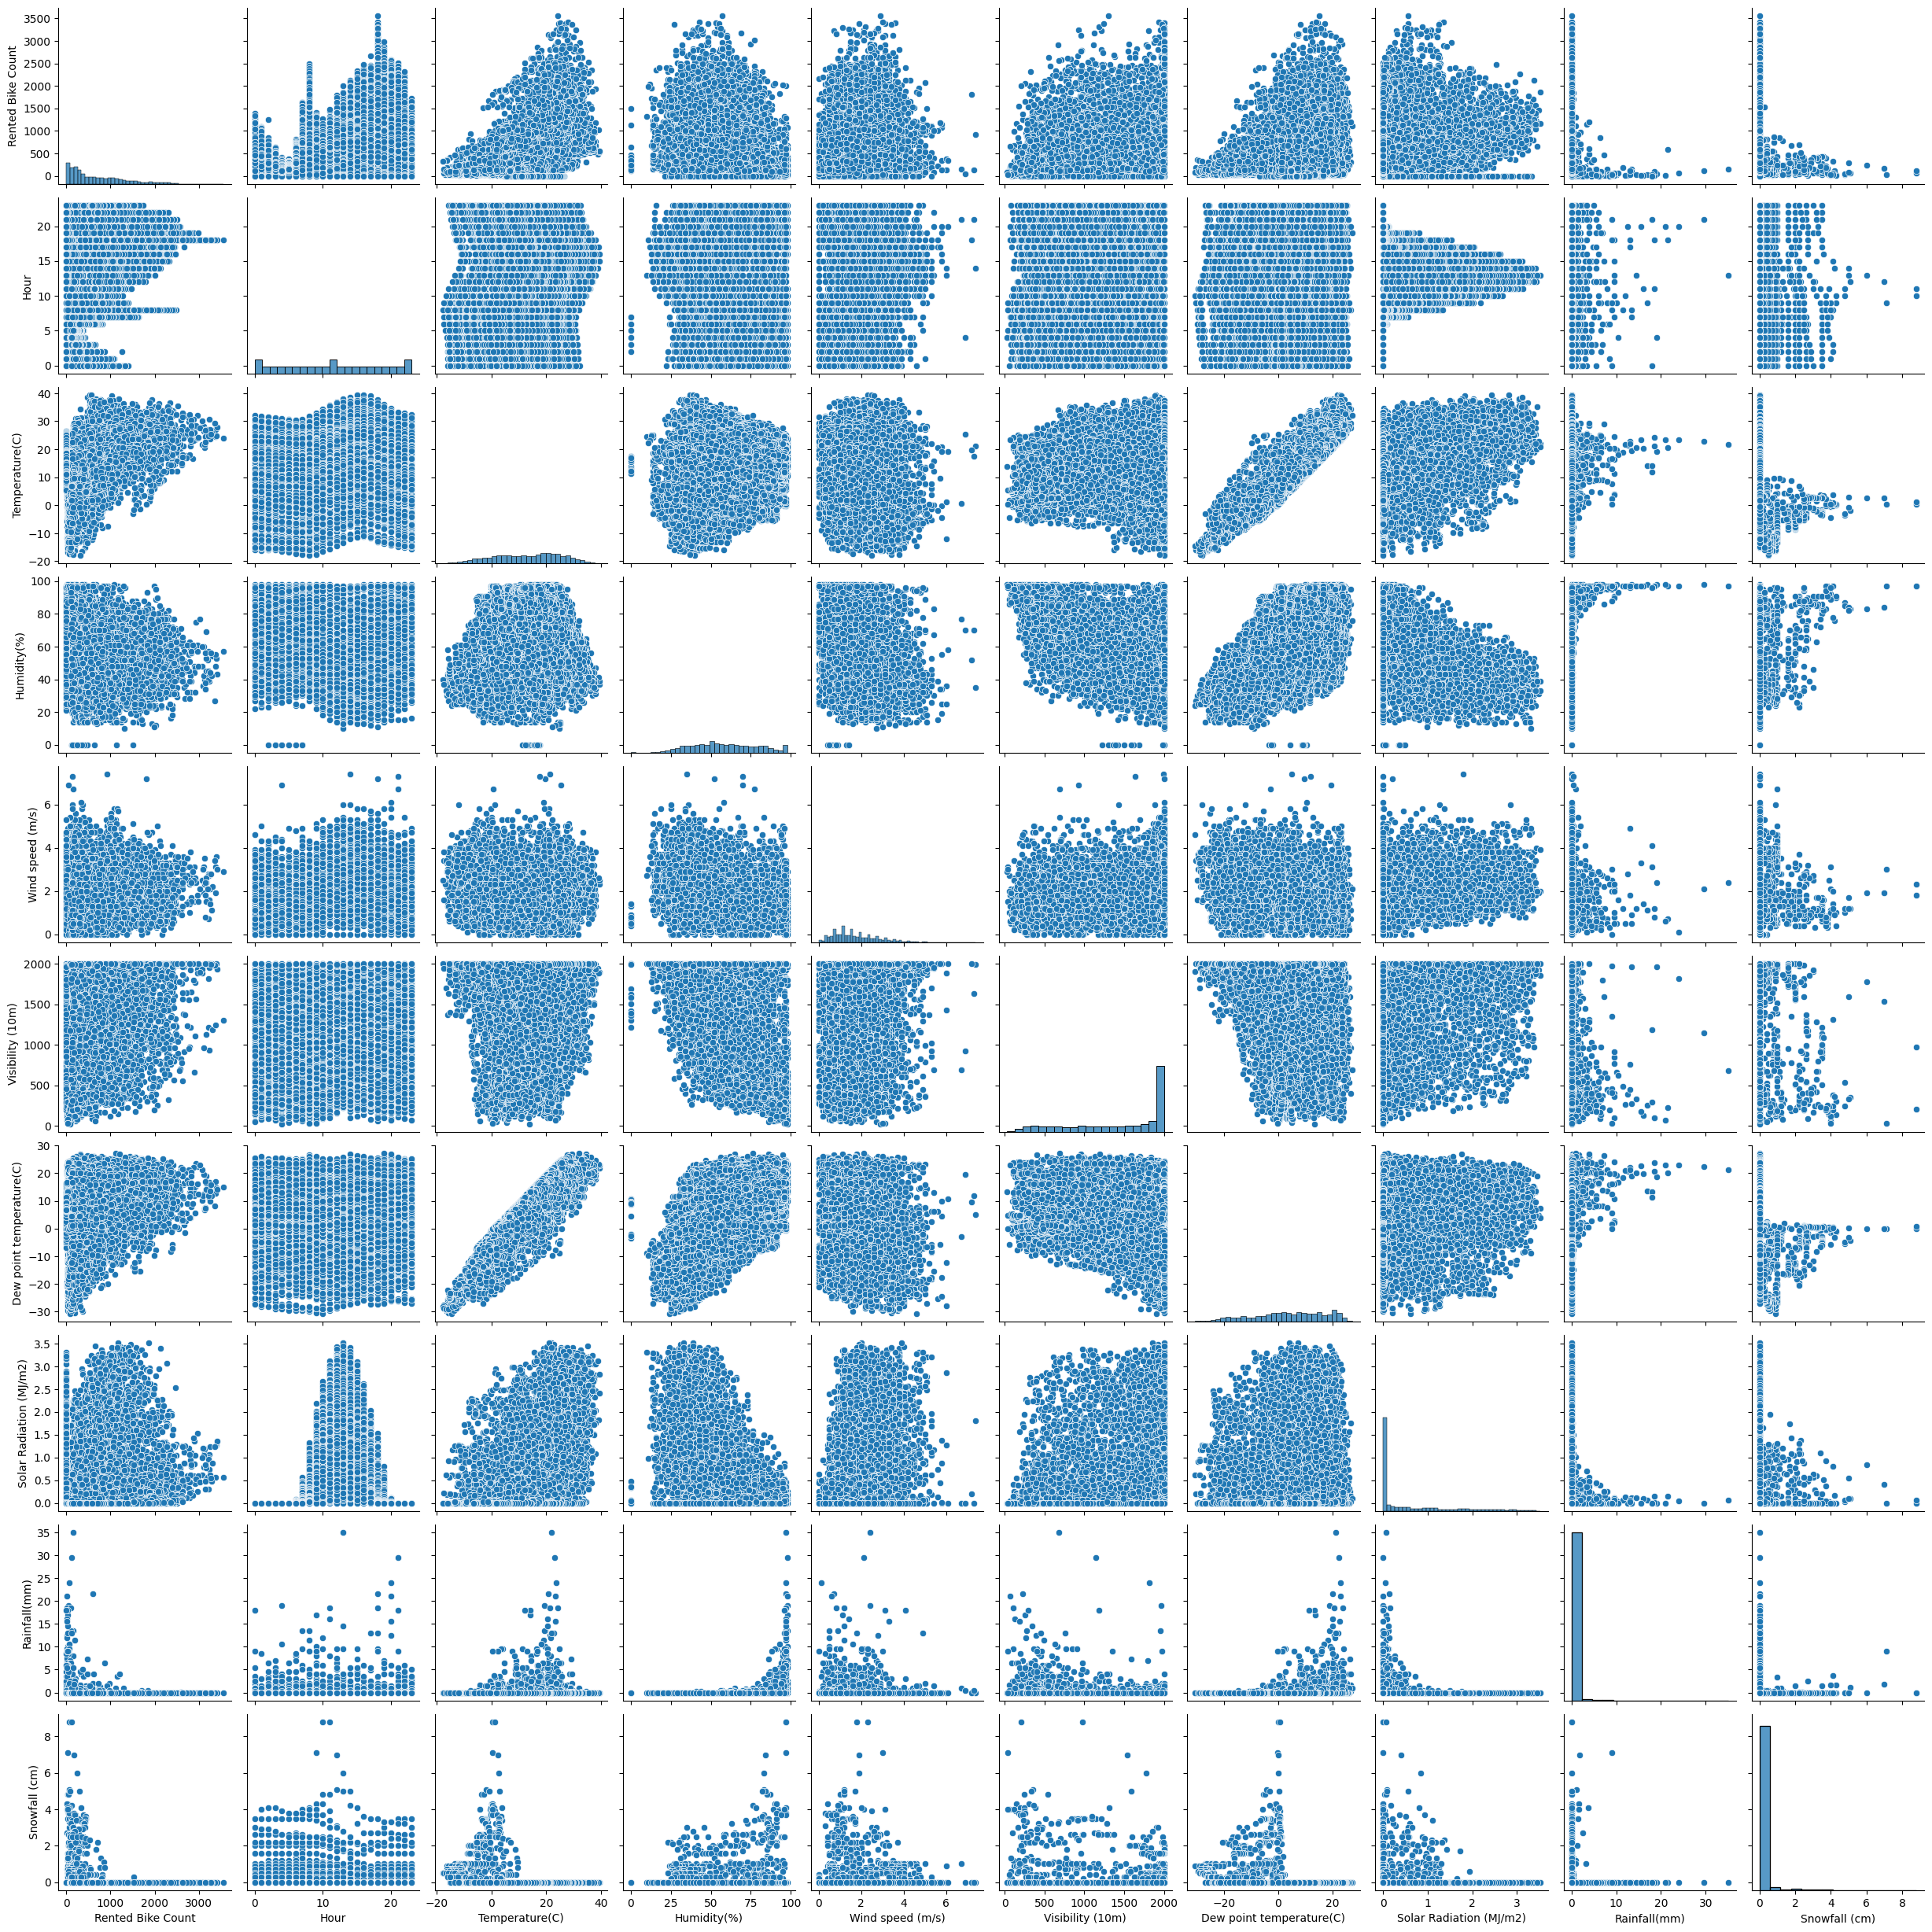

In [53]:
sns.pairplot(df[col_name[1:]], palette='dark')

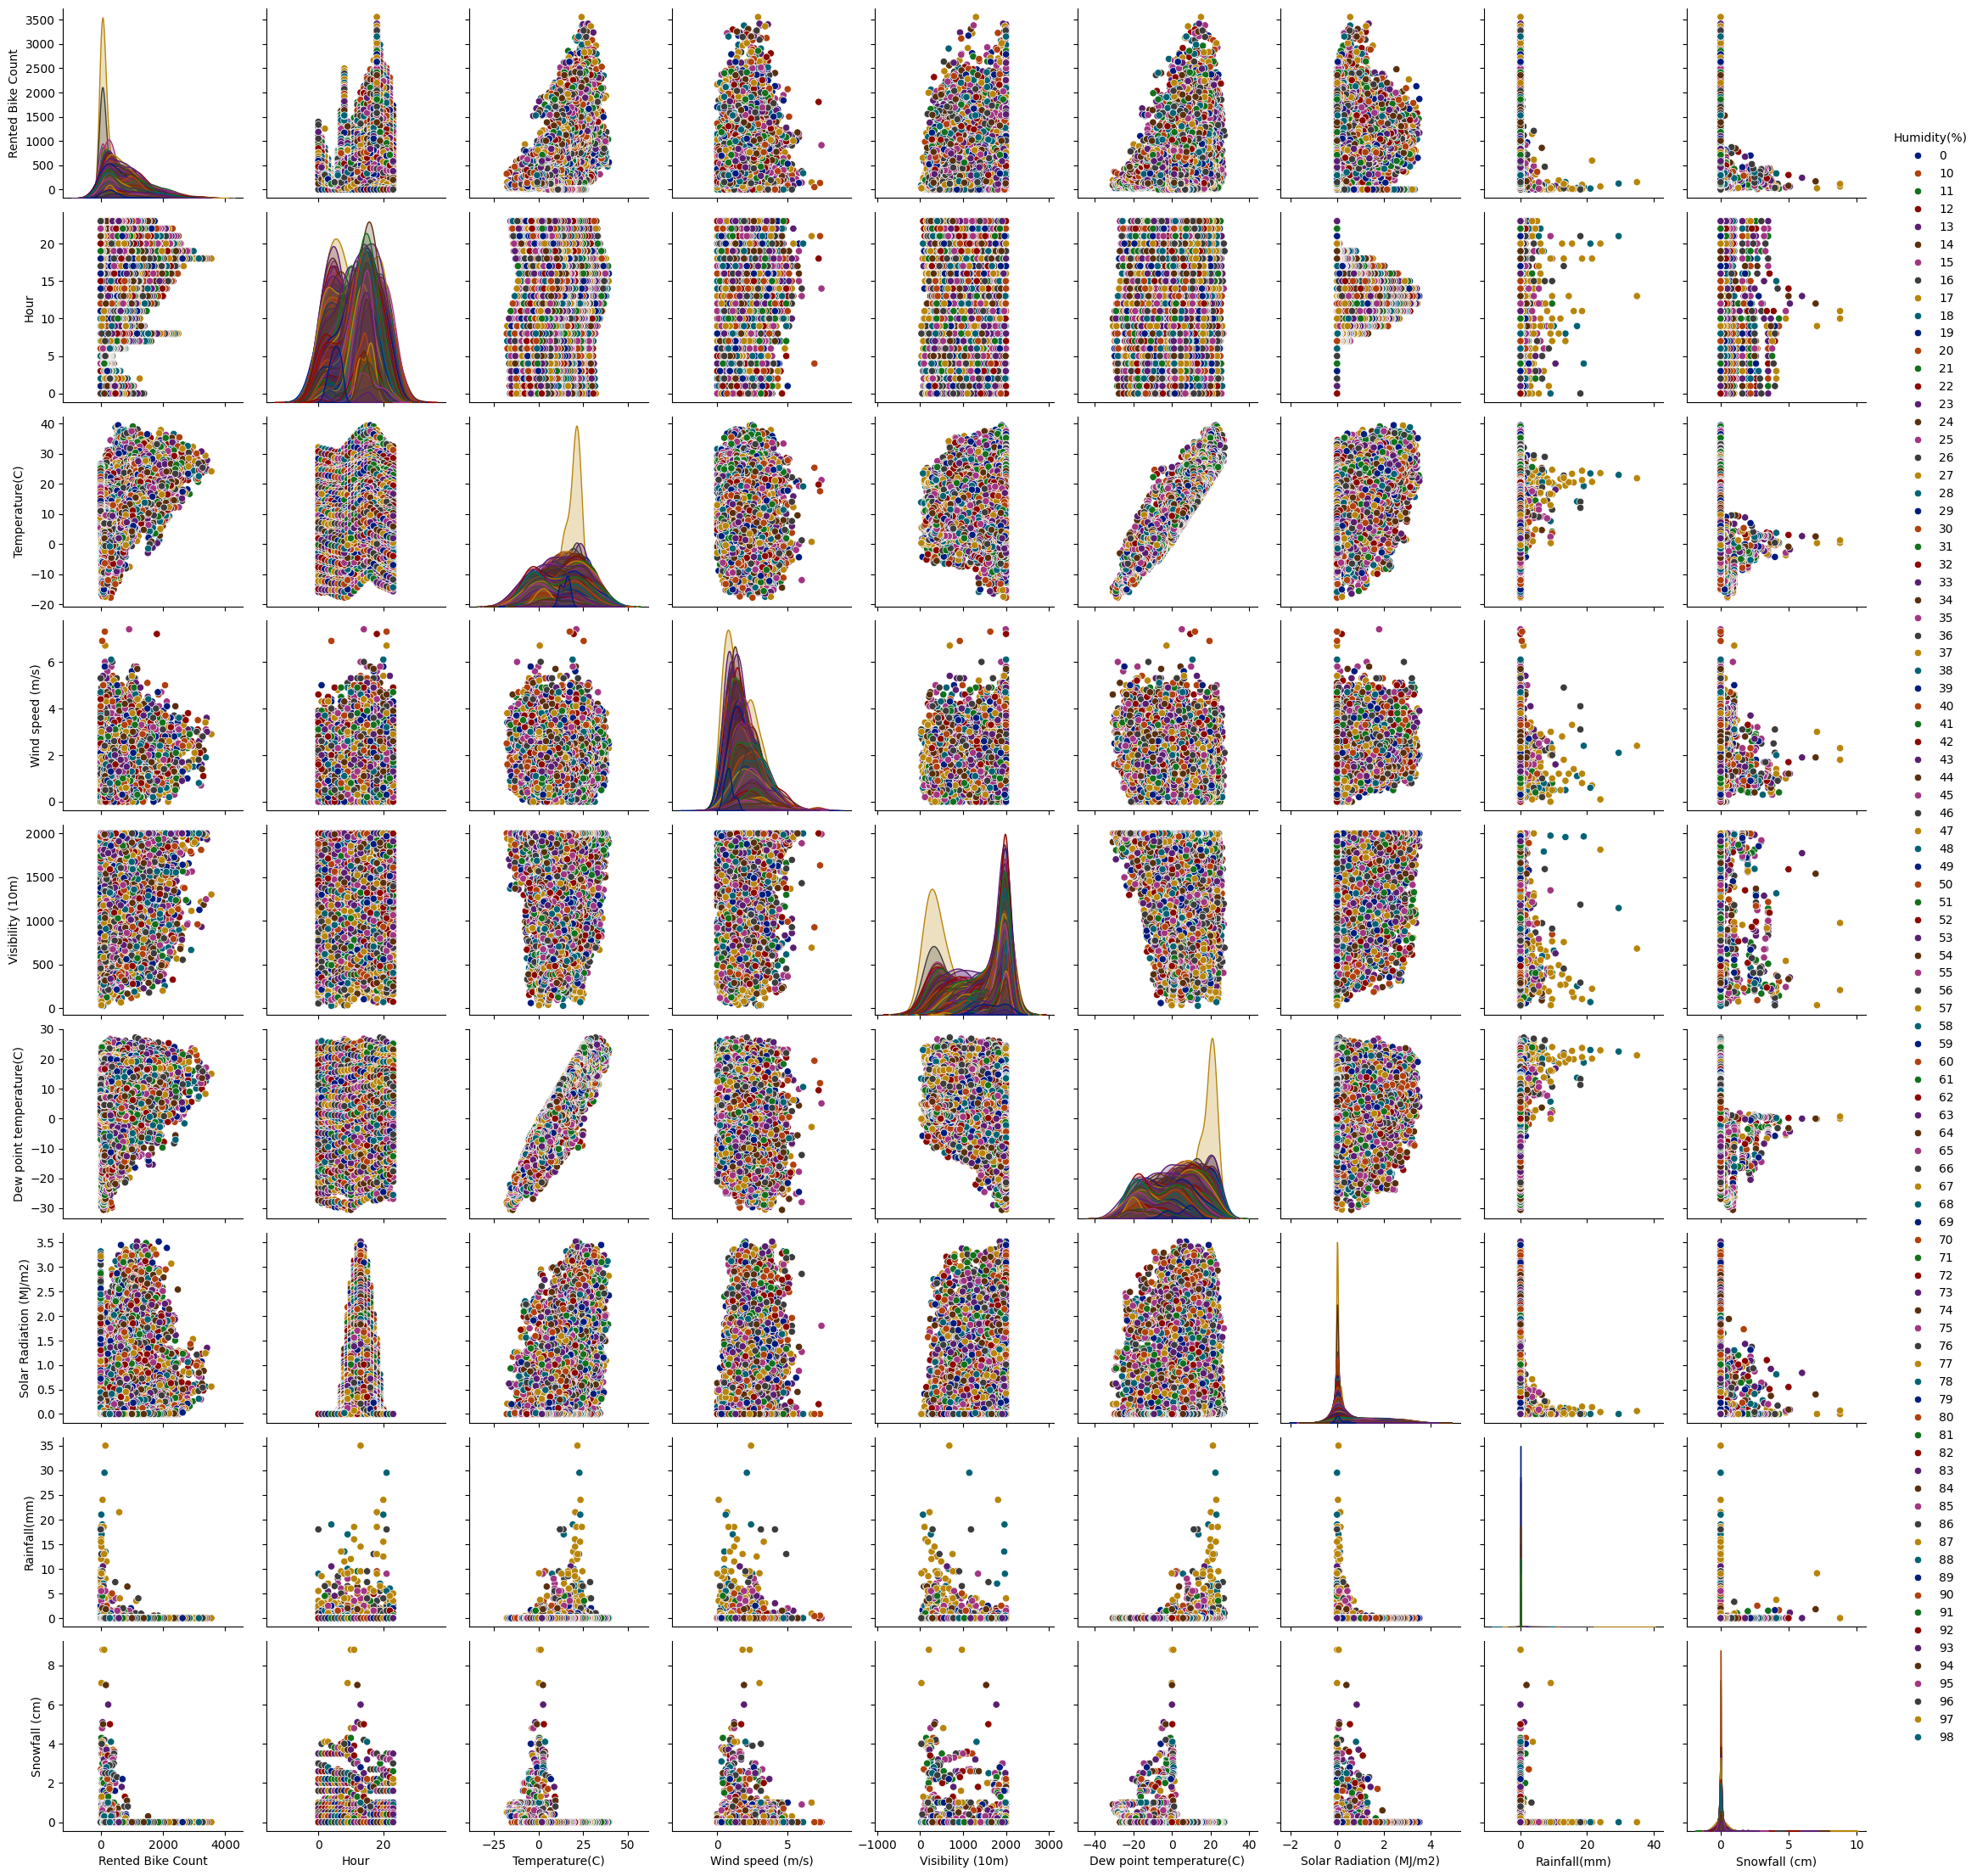

In [54]:
sns.pairplot(df[col_name[1:]], palette='dark', hue="Humidity(%)")

<Axes: xlabel='Date', ylabel='average_bike_count'>

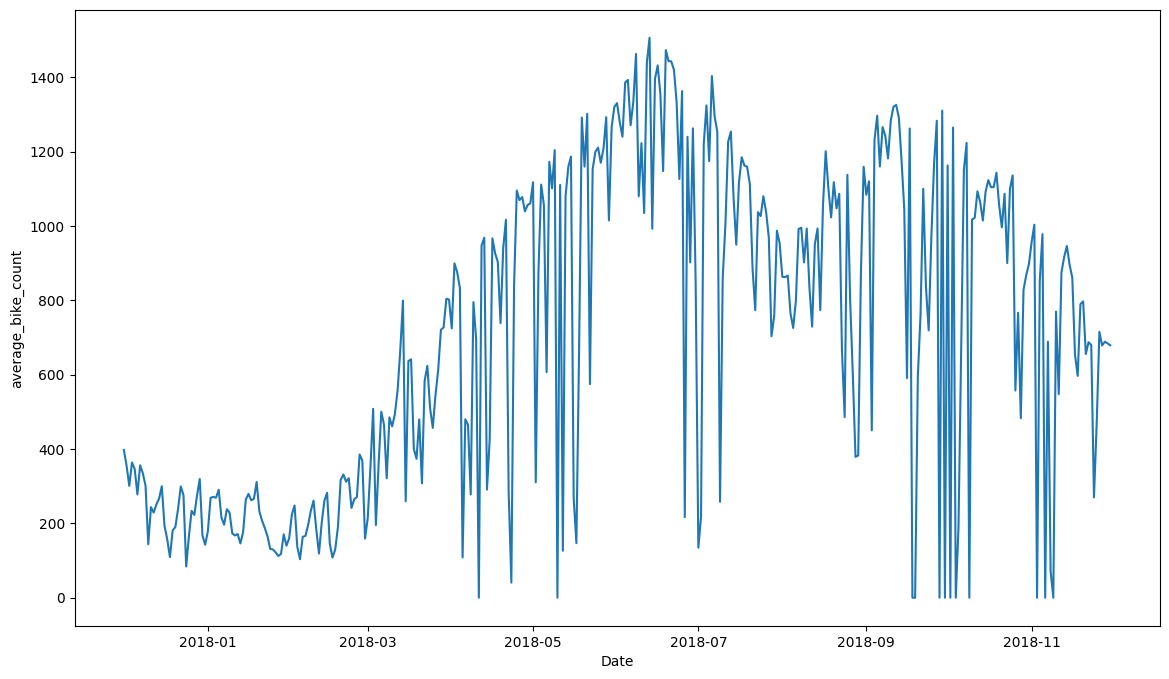

In [81]:
# What is the average number of bikes rented per day throughout the year?
sales_per_day = df.groupby(pd.Grouper(key="Date", freq='D')).agg(
    average_bike_count = ('Rented Bike Count', 'mean')
).reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_per_day, x='Date', y='average_bike_count')

<Axes: xlabel='Date', ylabel='average_bike_count'>

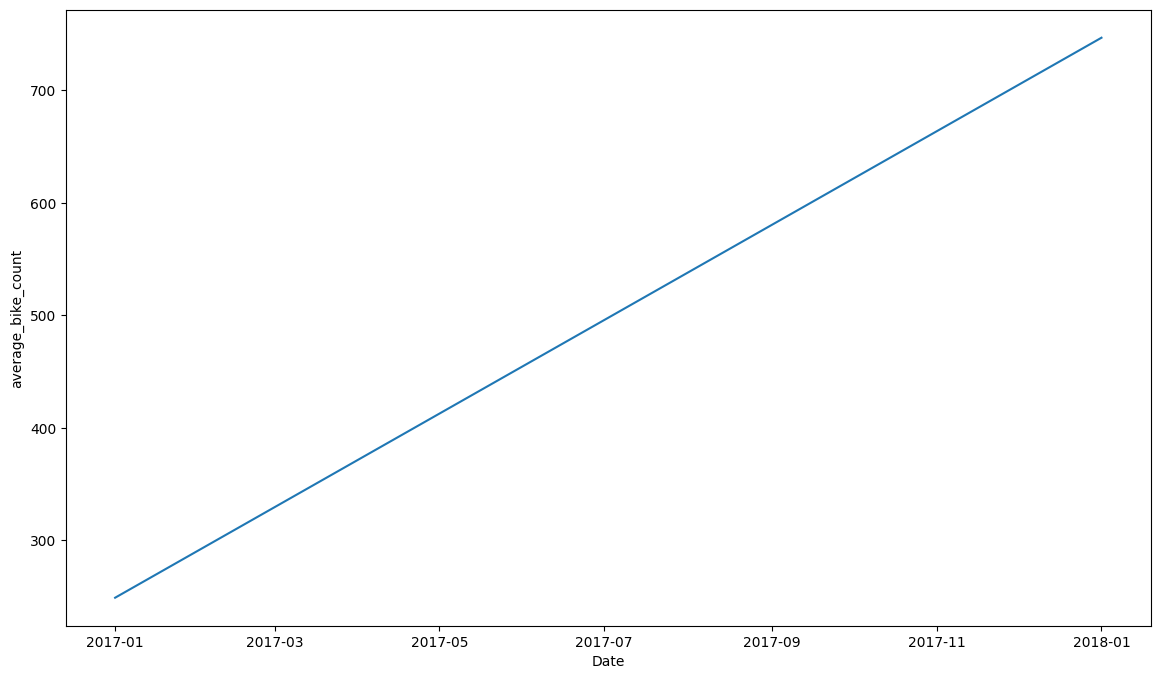

In [85]:
# What is the average number of bikes rented per day throughout the year?
sales_per_day = df.groupby(pd.Grouper(key="Date", freq='YS')).agg(
    average_bike_count = ('Rented Bike Count', 'mean')
).reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_per_day, x='Date', y='average_bike_count')